In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from os.path import isfile
from os import mkdir
import shutil

In [2]:
ALGORITHMS = [
    'cegp',
    'cem',
    'cfw',
    # 'flore',
    # '0.01_flore',
    '0.02_flore',
    # '0.04_flore',
    # '0.06_flore',
    # '0.08_flore',
    # 'lore'
]

DATASETS = [
    'adult',
    'german',
    'compas',
    'fico'
]

BLACKBOXES = [
    'NN',
    'SVM'
]

METRICS = {
    'dis_dist': 'distance_mh',
    'dis_count': 'avg_nbr_changes',
    'perf': 'perf',
    'hits': 'ratio',
    # 'impl': 'plausibility_sum',
    'impl_fixed': 'plausibility_fixed'
}

In [3]:
adult_idx=[7270,860,5390,5191,5734,6265,466,4426,5578,8322,1685,769,6949,2433
,5311,5051,6420,1184,4555,3385,6396,8666,9274,2558,7849,2047,2747,9167
,189,2734,3005,4658,1899,7734,1267,1528,3556,3890,8838,5393,8792,8433
,7513,2612,7041,9555,6235,5486,7099,9670,775,8226,3152,1585,3943,7555
,3073,1021,3843,7989,9692,6873,5675,161,4297,995,7629,9467,1016,7869
,6439,7892,6863,7916,8529,878,9268,4887,4859,6331,8571,8684,7208,5276
,2062,64,8006,2568,5463,2027,2695,9687,5258,5618,6736,391,5892,3561
,6184,3099]

In [4]:
german_idx=[102,270,106,71,188,20,102,121,214,87,99,151,130,149,257,293,191,276
,160,21,252,235,48,58,169,187,270,189,174,50,54,243,130,134,20,166
,273,88,13,241,264,52,91,263,34,205,80,49,1,53,105,259,190,217
,43,161,201,269,270,214,251,189,295,212,207,236,52,279,216,251,187,40
,156,14,64,8,128,135,62,138,80,162,288,260,230,40,27,134,200,267
,32,47,61,215,292,98,171,213,34,226]

In [5]:
compas_idx=[860,1294,1130,1095,1638,466,1238,330,1482,2135,130,1685,769,1515
,1215,955,1184,459,21,747,474,1082,2047,975,1806,189,562,1899
,1267,1528,646,2068,1297,600,2061,241,2041,1363,2139,1390,1478,775
,34,1955,1585,1021,1129,1500,702,1579,161,201,1981,995,815,455
,1275,1016,337,878,1076,791,763,379,492,1180,2062,64,1367,1152
,2027,1495,1162,1522,391,1698,418,378,1796,2088,200,1863,779,502
,1751,804,2146,1895,1570,960,1485,1028,502,397,870,392,206,1038
,1881,1484]

In [6]:
fico_idx=[860,1294,1130,1095,3092,1638,2169,466,1238,330,1482,2135,2919,130
,1685,769,2391,1515,2853,2433,1215,955,2324,1184,459,21,2300,747
,2904,474,1082,2558,2047,2747,975,1806,189,3005,2734,3005,562,1899
,1267,2879,1528,646,2068,2888,2214,1297,2435,600,2363,2061,241,2041
,2824,2612,2945,1363,2139,1390,3003,1478,2556,775,34,2253,1955,1585
,3073,1021,2613,1129,1500,702,2449,2777,1579,161,201,1981,995,2317
,815,455,1275,1016,2343,2767,337,878,1076,791,2264,763,2235,379
,492,3112]

In [7]:
indices = {
    'adult': adult_idx,
    'compas': compas_idx,
    'german': german_idx,
    'fico': fico_idx
}

In [8]:
def get_file_list(algo, folder):
    l = []
    m = []
    for db in indices:
        for i, idx in enumerate(indices[db]):
            for bb in ['SVM', 'NN']:
                if isfile(f'./{folder}/cf_performance_{db}_{bb}_{idx}_{algo}.csv'):
                    l.append(f'./{folder}/cf_performance_{db}_{bb}_{idx}_{algo}.csv')
                else:
                    m.append((db, bb, idx, algo))
    return l, m


In [9]:
folder = './results/'
file_list = np.concatenate([get_file_list(algo, folder)[0] for algo in ALGORITHMS])
# missing_file = np.concatenate([get_file_list(algo, folder)[1] for algo in ALGORITHMS])

In [10]:
def read_csv_with_th(file):
    df = pd.read_csv(file)
    s = file[:-4].split('/')[-1].split('_')
    algo = '_'.join(s[5:])
    df['method'] = algo
    return df

In [11]:
all_df = np.array([read_csv_with_th(file) for file in file_list])

C:\Users\Guille\AppData\Local\Temp\ipykernel_13172\535039358.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_df = np.array([read_csv_with_th(file) for file in file_list])


In [12]:
df = pd.concat(all_df).drop_duplicates()
xdf = df.groupby(['dataset', 'black_box', 'method']).mean().reset_index(level=[0,1,2])

In [13]:
df.nbr_cf = pd.to_numeric(df.nbr_cf)
df.idx = pd.to_numeric(df.idx)

In [14]:
adf = df.groupby(['dataset', 'black_box', 'method']).idx.nunique().reset_index(level=[0,1,2])
adf.rename(columns={'idx': 'number_cf'}, inplace=True)

In [15]:
xxdf = xdf.merge(right=adf, on=['dataset', 'black_box', 'method'])

In [16]:
xxdf['ratio'] = 0

In [17]:
xxdf.loc[xxdf.dataset == 'adult', 'ratio'] = xxdf[xxdf.dataset == 'adult']['number_cf'] / len(np.unique(adult_idx))
xxdf.loc[xxdf.dataset == 'compas', 'ratio'] = xxdf[xxdf.dataset == 'compas']['number_cf'] / len(np.unique(compas_idx))
xxdf.loc[xxdf.dataset == 'german', 'ratio'] = xxdf[xxdf.dataset == 'german']['number_cf'] / len(np.unique(german_idx))
xxdf.loc[xxdf.dataset == 'fico', 'ratio'] = xxdf[xxdf.dataset == 'fico']['number_cf'] / len(np.unique(fico_idx))

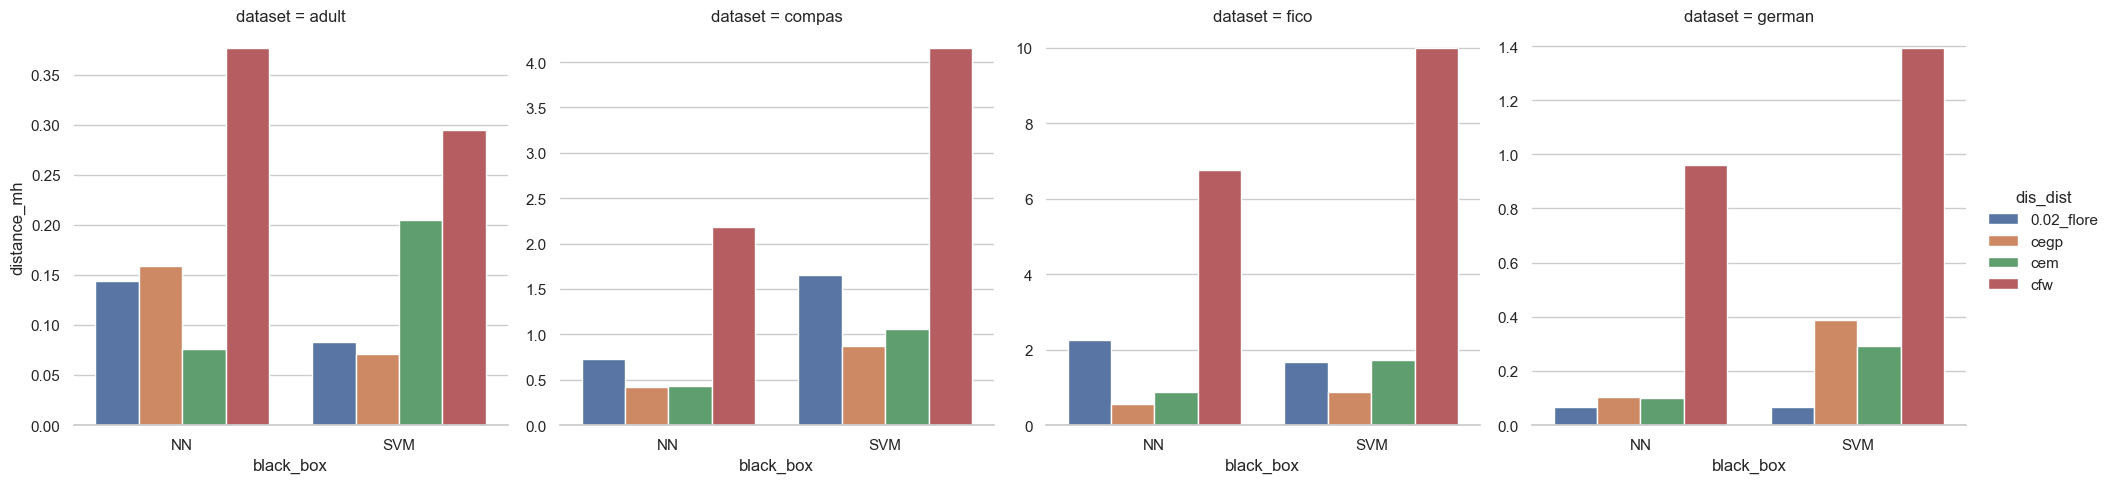

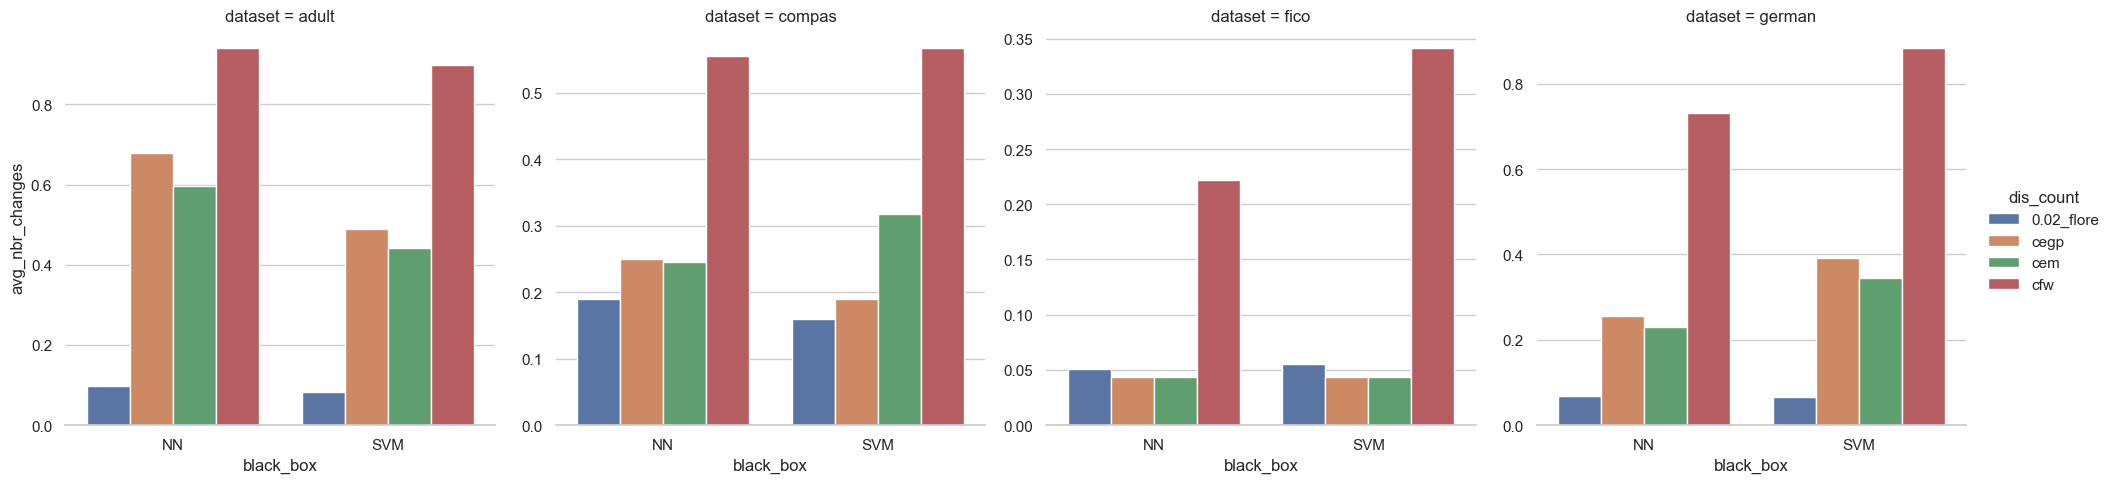

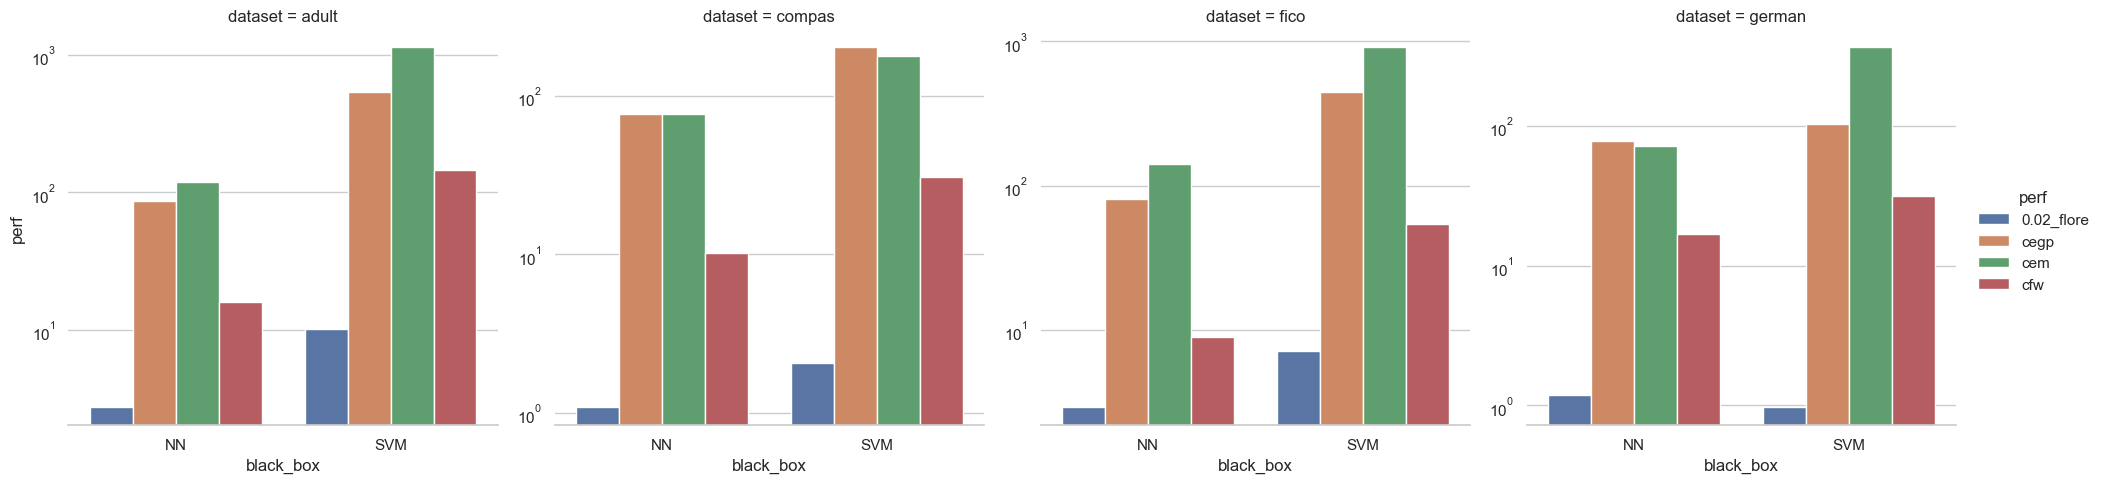

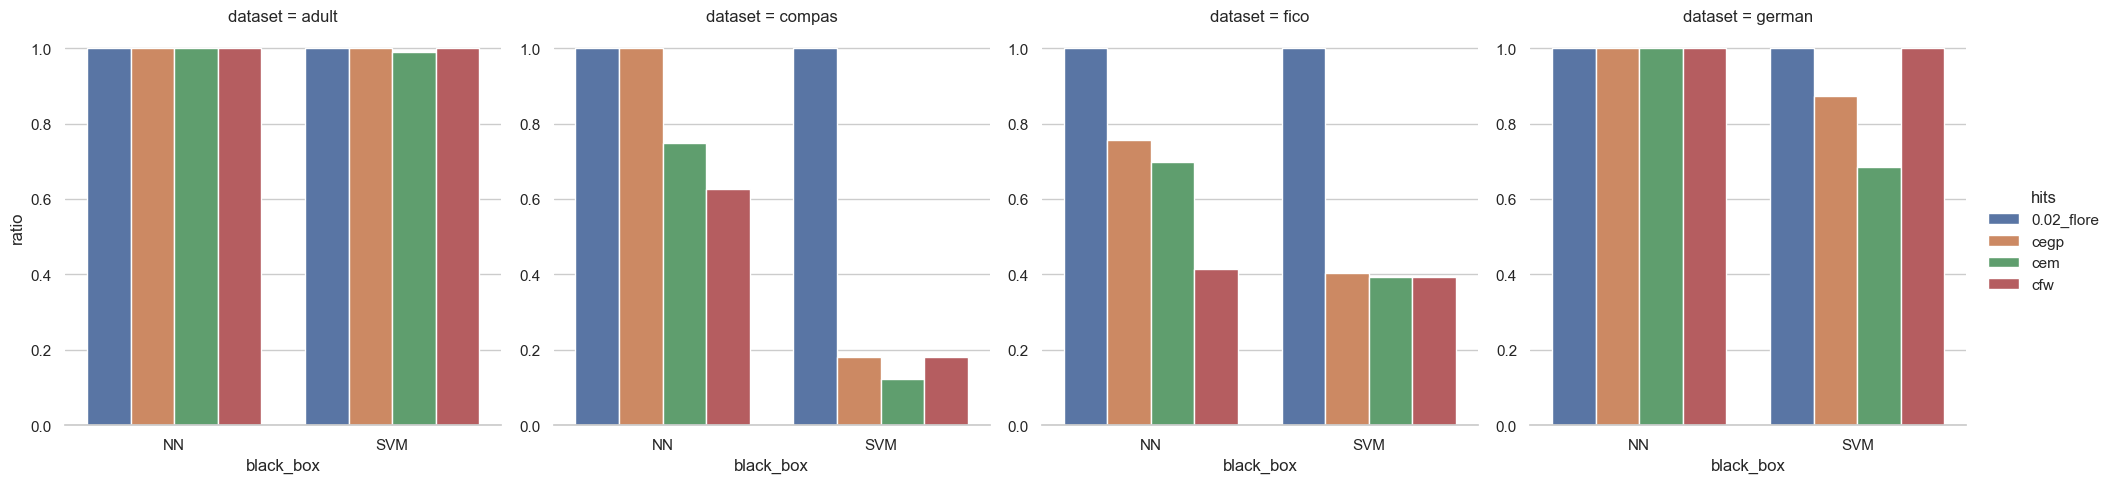

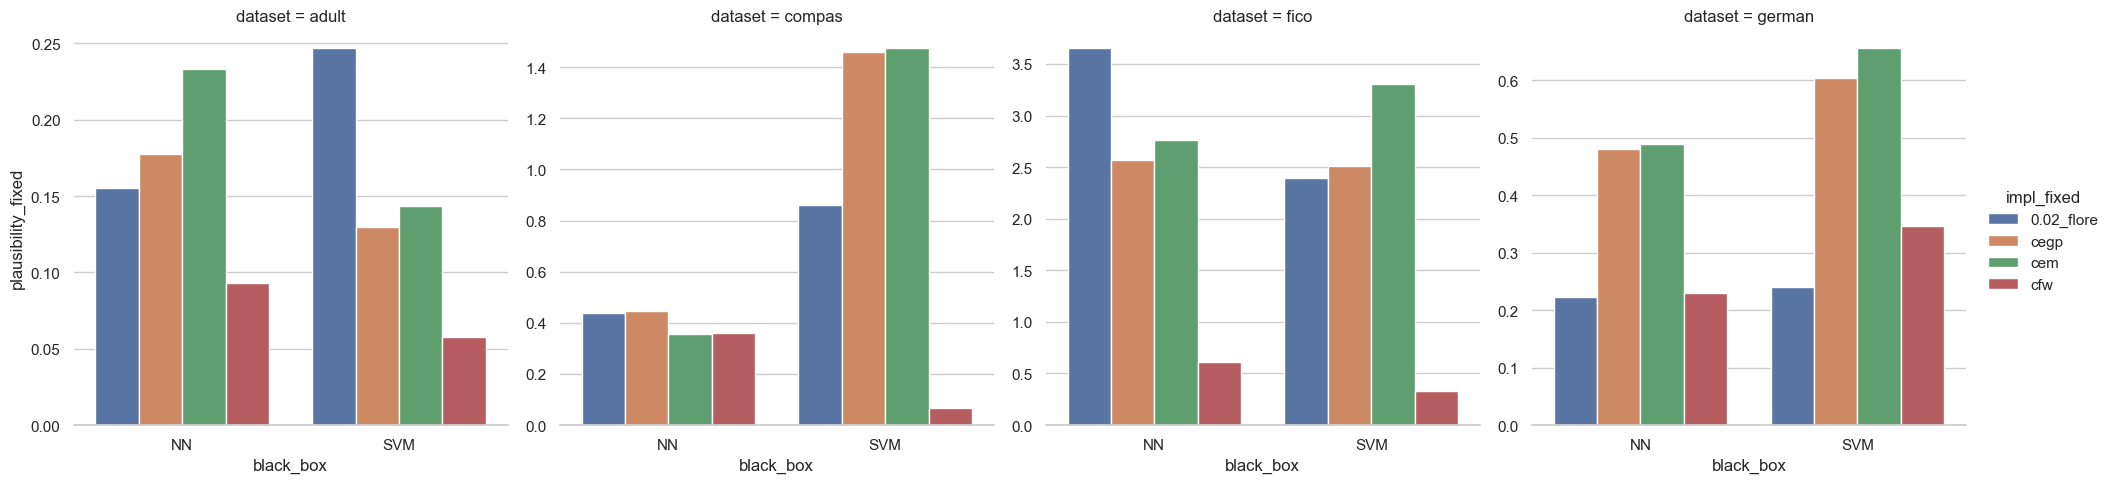

In [18]:
# creating subplots
sns.set_theme(style="whitegrid")

for metric in METRICS:
    # plotting columns
    g = sns.catplot(
        data = xxdf,
        kind = 'bar',
        x='black_box', 
        y=METRICS[metric],
        hue = 'method',
        col = 'dataset',
        sharey=False
    )

    if metric == 'perf':
        g.set(yscale="log")

    g.despine(left=True)
    g.legend.set_title(metric)

In [19]:
METRICS

{'dis_dist': 'distance_mh',
 'dis_count': 'avg_nbr_changes',
 'perf': 'perf',
 'hits': 'ratio',
 'impl_fixed': 'plausibility_fixed'}

In [20]:
xxdf['distance_mh_ratio'] = xxdf.distance_mh * (1 + 1 - xxdf.ratio)
xxdf['avg_nbr_changes_ratio'] = xxdf.avg_nbr_changes * (1 + 1 - xxdf.ratio)
xxdf['plausibility_fixed_ratio'] = xxdf.plausibility_fixed * (1 + 1 - xxdf.ratio)

In [21]:
def plot_overlapped_graph(ds, metric, ax, newax, df, ratio=True):
    if ratio:
        sns.set_theme(style="whitegrid", palette='pastel')

        g = sns.barplot(
            ax=ax,
            data = df[df.dataset == ds],
            x='black_box', 
            y=f'{metric}_ratio',
            hue = 'method',
            hue_order=[
                'CEGP',
                'CEM',
                'WACH',
                'FLARE',
            ],
            alpha = 0.7
        )

        g.set(ylabel=None)
        g.set(xlabel=f'Dataset = {ds}')
        sns.despine(left=True)
        # Hide legend from barplot
        ax.get_legend().remove()

    sns.set_theme(style="whitegrid")
    j = sns.barplot(
        ax=newax,
        data = df[df.dataset == ds],
        x='black_box', 
        y=metric,
        hue = 'method',
        hue_order=[
            'CEGP',
            'CEM',
            'WACH',
            'FLARE',
        ],

    )

    j.set(ylabel=None)
    j.set(xlabel=f'Dataset = {ds}')
    if metric == 'perf':
        j.set(yscale="log")
    
    sns.despine(left=True)
    if ds != 'fico':
       newax.get_legend().remove() 
    else:
        sns.move_legend(newax, "upper left", bbox_to_anchor=(1, 1))


    
    # leg = j.legend()
    # leg.set_visible(True)

    # ll = g.legend()
    # ll.set_visible(False)
    return j





<>:48: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:48: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Guille\AppData\Local\Temp\ipykernel_13172\2296069852.py:48: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if ds is not 'fico':


In [22]:
METRICS

{'dis_dist': 'distance_mh',
 'dis_count': 'avg_nbr_changes',
 'perf': 'perf',
 'hits': 'ratio',
 'impl_fixed': 'plausibility_fixed'}

In [23]:
RATIO_METRICS = {
    'distance_mh': 'Distance',
    'avg_nbr_changes': 'Number of changes',
    'plausibility_fixed': 'Implausibility'
}

In [24]:
nxxdf = xxdf.copy()
nxxdf.loc[nxxdf.method == 'cegp', 'method'] = 'CEGP'
nxxdf.loc[nxxdf.method == 'cem', 'method'] = 'CEM'
nxxdf.loc[nxxdf.method == 'cfw', 'method'] = 'WACH'
nxxdf.loc[nxxdf.method == '0.02_flore', 'method'] = 'FLARE'



In [25]:
NO_RATIO_METRICS = {
    'perf': 'Performance',
    'ratio': 'Number of found CFs',
}

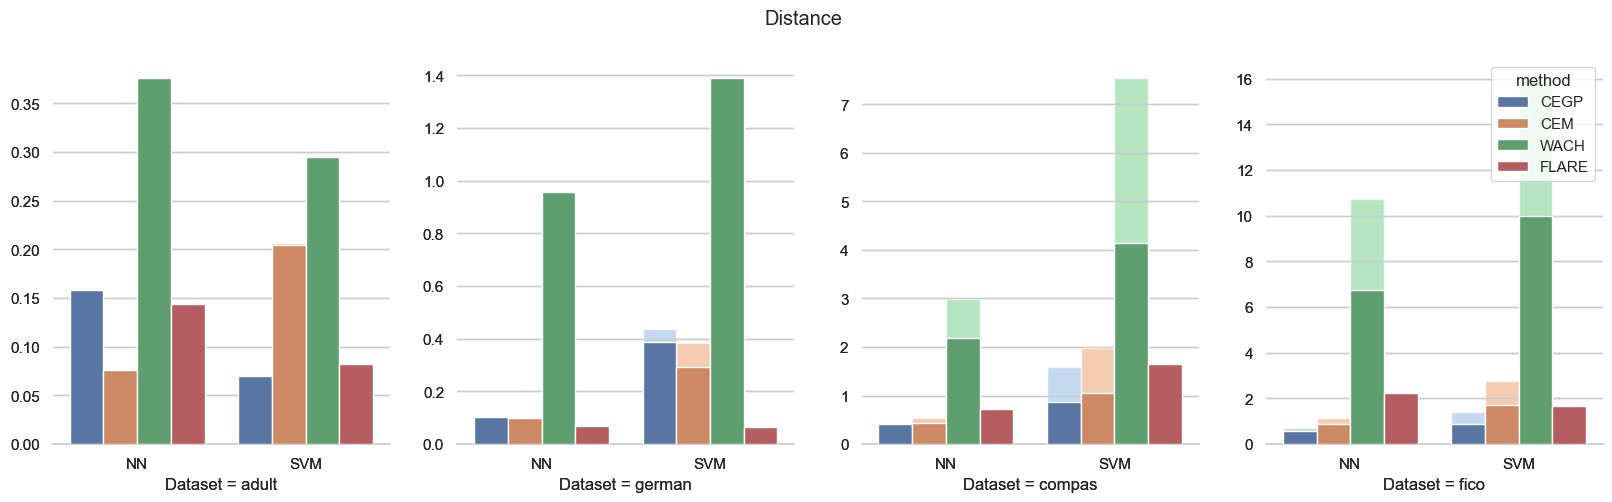

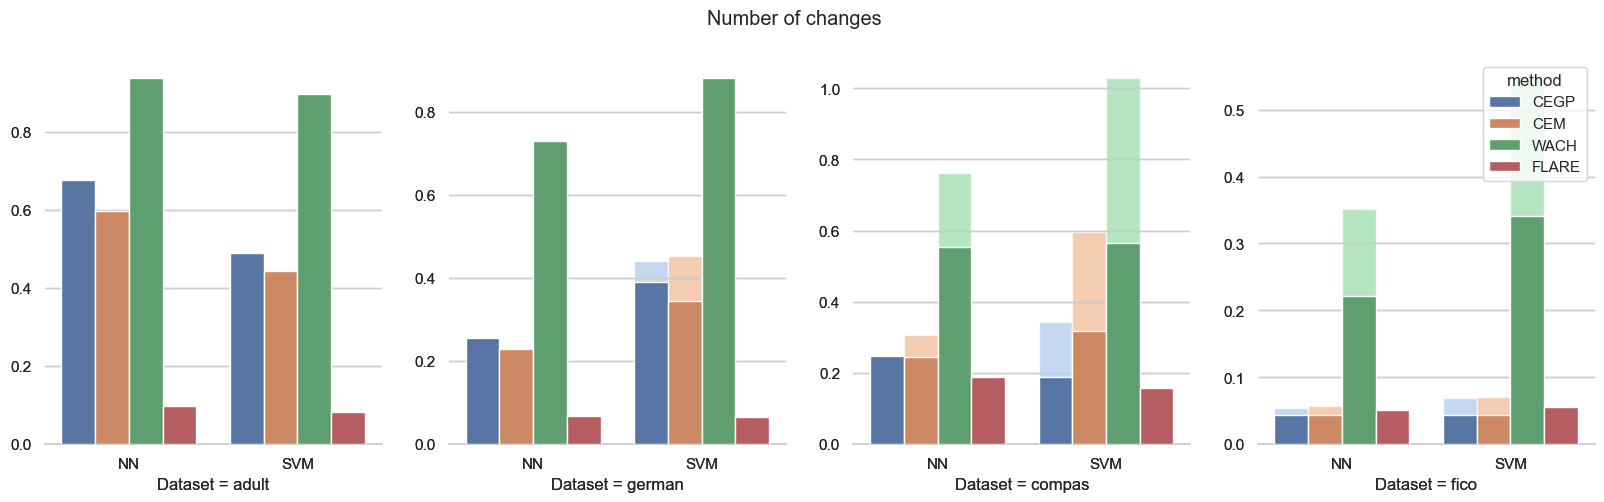

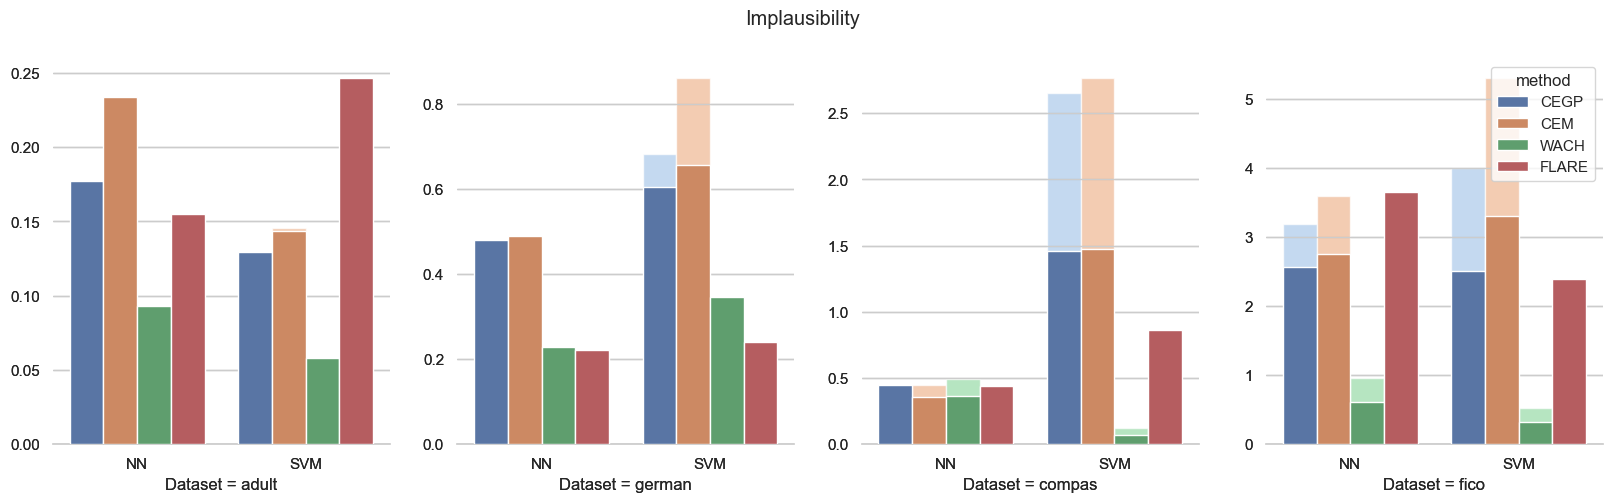

In [26]:
for metric in RATIO_METRICS:
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    fig.suptitle(RATIO_METRICS[metric].capitalize())
    for ds, ax in zip(DATASETS, axes):
        newax = fig.add_axes(ax.get_position(), frameon=False, sharey=ax)
        # newax.set(xticklabels=[])
        # ax.set(xticklabels=[])
        plot_overlapped_graph(ds, metric, ax, newax, nxxdf)

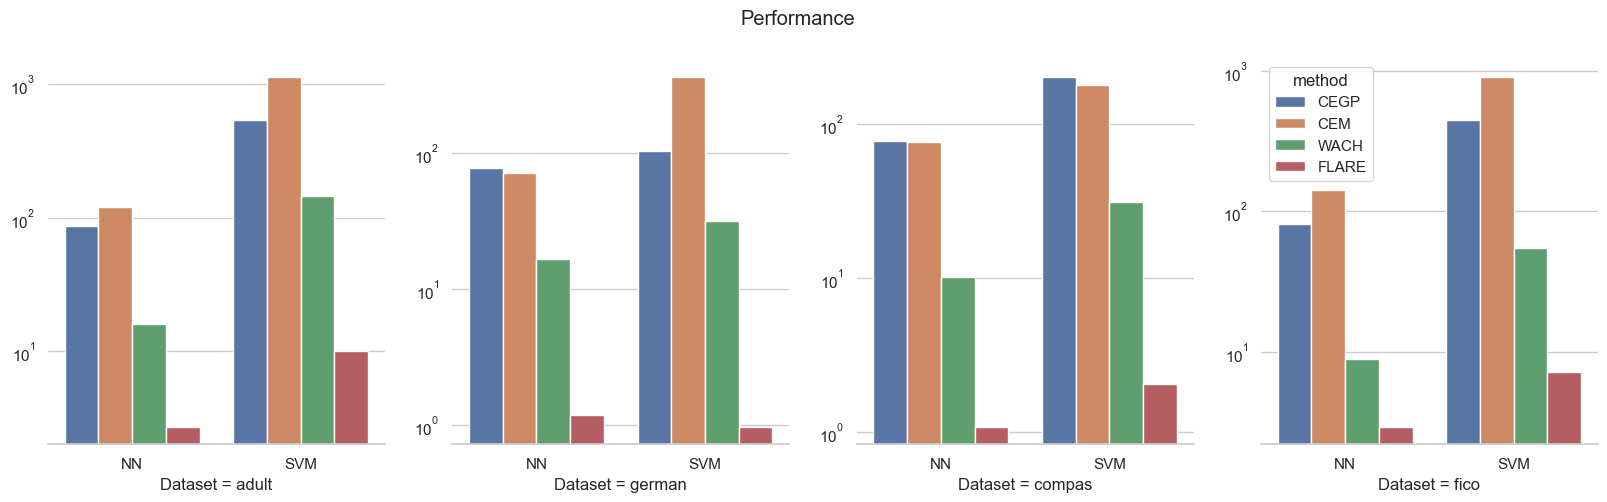

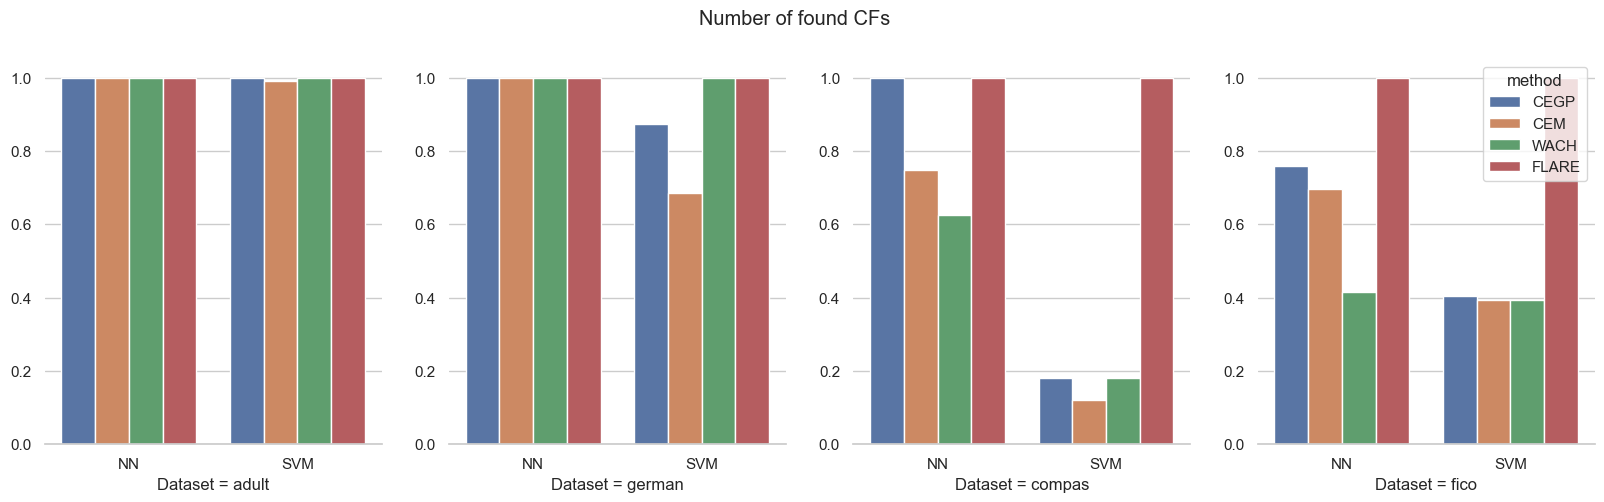

In [27]:
for metric in NO_RATIO_METRICS:
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    fig.suptitle(NO_RATIO_METRICS[metric])
    for ds, ax in zip(DATASETS, axes):

        ax.set(xticklabels=[])
        plot_overlapped_graph(ds, metric, ax, ax, nxxdf, ratio=False)

In [28]:
tdf = pd.DataFrame({'High Temp': [28, 30, 34, 38, 45, 42,
                                 38, 35, 32, 28, 25, 21],
                   'Low Temp': [22, 26, 30, 32, 41, 38,
                                32, 31, 28, 22, 15, 15],
                   'Avg Temp': [25, 28, 32, 35, 43, 40,
                                35, 33, 30, 25, 20, 18]},
                  index=['Jan', 'Feb', 'Mar', 'Apr', 'May',
                         'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                         'Nov', 'Dec'])

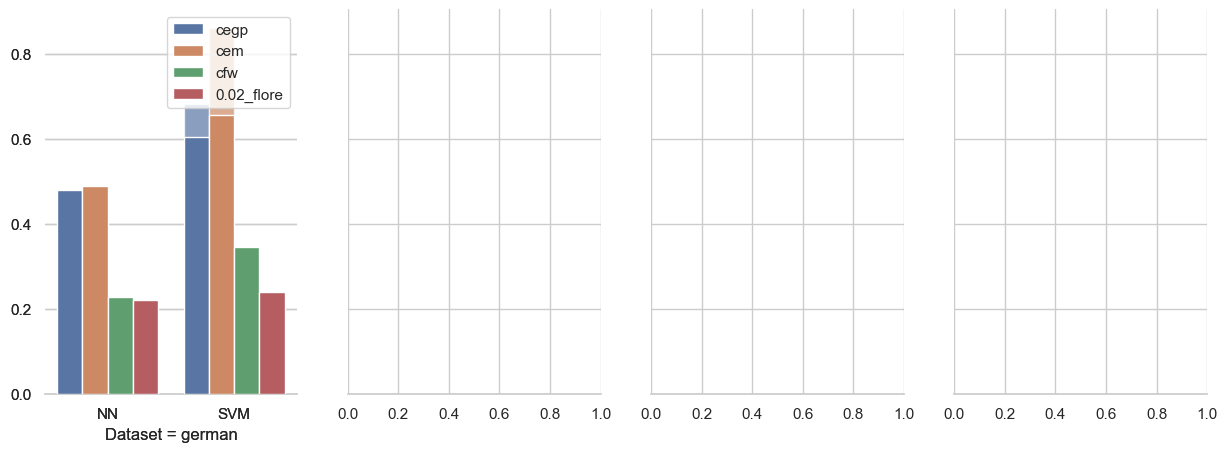

In [29]:
ds = 'german'
metric = 'plausibility_fixed'
# for metric in RATIO_METRICS:
#     for ds in DATASETS:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
g = sns.barplot(
    ax=axes[0],
    data = xxdf[xxdf.dataset == ds],
    x='black_box', 
    y=f'{metric}_ratio',
    hue = 'method',
    hue_order=[
        'cegp',
        'cem',
        'cfw',
        '0.02_flore',
    ],
    alpha=0.7

)
newax = fig.add_axes(axes[0].get_position(), frameon=False, sharey=axes[0])
g.set(ylabel=None)
g.set(xlabel=f'Dataset = {ds}')
sns.despine(left=True)

sns.set_theme(style="whitegrid")
j = sns.barplot(
    ax=newax,
    data = xxdf[xxdf.dataset == ds],
    x='black_box', 
    y=metric,
    hue = 'method',
    hue_order=[
        'cegp',
        'cem',
        'cfw',
        '0.02_flore',
    ],

)

j.set(ylabel=None)
j.set(xlabel=f'Dataset = {ds}')
sns.despine(left=True)


# Hide legend from barplot
# j.legend_.remove()

leg = j.legend()
leg.set_visible(True)

ll = g.legend()
ll.set_visible(False)
plt.show()

In [30]:
xxdf

,dataset,black_box,method,k,time_train,time_test,runtime,perc_valid_cf,perc_valid_cf_all,perc_actionable_cf,...,plausibility_nbr_valid_cf,plausibility_nbr_actionable_cf,plausibility_nbr_valid_actionable_cf,plausibility_fixed,perf,number_cf,ratio,distance_mh_ratio,avg_nbr_changes_ratio,plausibility_fixed_ratio
0,adult,NN,0.02_flore,NaN,NaN,NaN,NaN,0.280000,0.280000,1.000000,...,1.876852,1.876852,1.876852,0.155058,2.729032,100,1.000000,0.143456,0.096667,0.155058
1,adult,NN,cegp,1.0,0.000020,85.938683,85.938703,1.000000,1.000000,0.000000,...,0.693881,0.693881,0.693881,0.177408,85.938707,100,1.000000,0.158454,0.678333,0.177408
2,adult,NN,cem,1.0,0.000005,119.609566,119.609571,1.000000,1.000000,0.000000,...,0.746425,0.746425,0.746425,0.233496,119.609540,100,1.000000,0.075987,0.596667,0.233496
3,adult,NN,cfw,1.0,0.006275,0.000000,0.006275,0.090000,0.090000,0.000000,...,0.236398,0.236398,0.236398,0.093050,15.986534,100,1.000000,0.376423,0.940000,0.093050
4,adult,SVM,0.02_flore,NaN,NaN,NaN,NaN,0.350000,0.350000,1.000000,...,2.389151,2.389151,2.389151,0.246851,10.045646,100,1.000000,0.082500,0.082500,0.246851
5,adult,SVM,cegp,1.0,0.000010,536.988384,536.988394,1.000000,1.000000,0.000000,...,0.696270,0.696270,0.696270,0.129584,536.988365,100,1.000000,0.070484,0.489167,0.129584
6,adult,SVM,cem,1.0,0.000005,1134.039794,1134.039799,1.000000,1.000000,0.000000,...,0.749595,0.749595,0.749595,0.143829,1134.039764,99,0.990000,0.206456,0.447189,0.145267
7,adult,SVM,cfw,1.0,0.002055,0.000000,0.002055,0.130000,0.130000,0.000000,...,0.272921,0.272921,0.272921,0.057901,145.474036,100,1.000000,0.294770,0.898333,0.057901
8,compas,NN,0.02_flore,NaN,NaN,NaN,NaN,0.220000,0.220000,1.000000,...,9.229546,9.229546,9.229546,0.437093,1.084351,99,1.000000,0.730922,0.190000,0.437093
9,compas,NN,cegp,1.0,0.000010,77.134986,77.134996,1.000000,1.000000,0.000000,...,1.710831,1.710831,1.710831,0.445814,77.134969,99,1.000000,0.419503,0.249000,0.445814
